# NO se copie, si tiene alguna duda mire la bibliografia

# Cliqué Máximo

Librerias

In [306]:
import networkx as nx
import matplotlib.pyplot as plt

- crear vectores del grafo

In [307]:
def addZeros(numBin,n):
    zeros = ''
    for i in range(n-len(numBin)):
        zeros+='0'
    return zeros + numBin

def binaryVectors(n):
    bv = []
    maxVectors = 2**n
    for i in range(maxVectors):
        numBin = bin(i).lstrip('0b') #Quitar referencia de binario
        bv.append(addZeros(numBin,n))
    return bv

- Prueba de la funcion binaryVectors(n)

In [308]:
print binaryVectors(2)
print binaryVectors(3)

['00', '01', '10', '11']
['000', '001', '010', '011', '100', '101', '110', '111']


- Algoritmo de Bron-Kerbosch

In [309]:
#Investigado: http://www.dfki.de/~neumann/ie-seminar/presentations/finding_cliques.pdf
# https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm#Example
#Tomao de: http://www.it1me.com/it-answers?id=13904636&ttl=Implementing+Bron%E2%80%93Kerbosch+algorithm+in+python

#function determines the neighbors of a given vertex
def N(vertex,graph):
    c = 0
    l = []
    for i in graph[vertex]:
        if i is 1 :
            l.append(c)
        c+=1   
    return l 

#the Bron-Kerbosch recursive algorithm
def bronk(r,p,x,graph,cliques):
    if len(p) == 0 and len(x) == 0:
        #print r
        cliques.append(r)
        return
    for vertex in p[:]:
        r_new = r[::]
        r_new.append(vertex)
        p_new = [val for val in p if val in N(vertex,graph)] # p intersects N(vertex)
        x_new = [val for val in x if val in N(vertex,graph)] # x intersects N(vertex)
        bronk(r_new,p_new,x_new,graph,cliques)
        p.remove(vertex)
        x.append(vertex)

def BronKerbosch_Algorithm(graph,v):
    cliques = []
    bronk([],v, [],graph,cliques)
    return cliques

- Distancia de hamming

In [310]:
#tomado de: https://stackoverflow.com/questions/31007054/hamming-distance-between-two-binary-strings-not-working
def hammingDistance(s1, s2):
    """Calculate the Hamming distance between two bit strings"""
    assert len(s1) == len(s2)
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

- Implementacion del grafo con Algoritmo de Bron-Kerbosch

In [324]:
def zerolistmaker(n):
    return [[0] * n for i in range(n)]

def Create_Adja_Mat(graph):
    edges = nx.edges(graph)
    vertex = nx.nodes(graph)
    vertex.sort()
    numberVertex = nx.number_of_nodes(graph)
    AdjacencyMatrix = zerolistmaker(numberVertex)
    for i in edges:
        x = vertex.index(i[0])
        y = vertex.index(i[1])
        AdjacencyMatrix[x][y] = 1        
    return AdjacencyMatrix, numberVertex

def lenMaxClique(Cliques):
    maxi = 0
    for i in Cliques:
        if maxi < len(i):
            maxi = len(i)
    return maxi
        

def HammingGraph(n,d):
    if n < d:
        return 0
    graph = nx.DiGraph()
    #Agregar Vertices
    bv = binaryVectors(n)
    graph.add_nodes_from(bv)
    #Agregar las Aristas
    for i in bv:
        for j in bv:
            hammingDist = hammingDistance(i,j)
            if i <> j and hammingDist >= d:
                #Añadir el peso
                graph.add_weighted_edges_from([(i,j,hammingDist)])
    nx.draw_circular(graph)
    plt.show()
    
    AdjacencyMatrix, numberVertex  = Create_Adja_Mat(graph)        
    Cliques = BronKerbosch_Algorithm(AdjacencyMatrix,range(numberVertex))    
    return lenMaxClique(Cliques)      
                

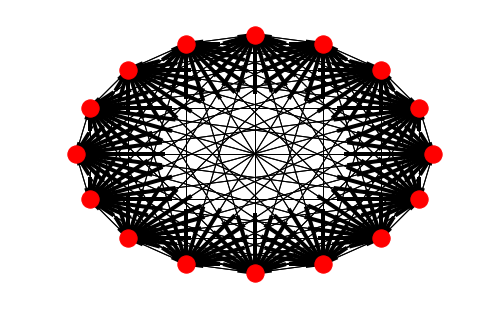

Cliqué Máximo es  16


In [325]:
MaxClique = HammingGraph(4,1)
print "Cliqué Máximo es ", MaxClique